In [1]:
# Importing of required packages
import requests
from datetime import date, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Setting dates
today = date.today()
days_to_subtract = 30
subtracted_date = today - timedelta(days=days_to_subtract)

# Parsing dates to strings
parse_today = today.strftime("%Y-%m-%d")
parse_subtracted_date = subtracted_date.strftime("%Y-%m-%d")

In [3]:
# Creating a dates list with "days_to_subtract" number of dates
date_list = []
for i in range(days_to_subtract+1):
    date_list.append(today - timedelta(days = i))

# Parsing dates to string    
date_list_str = [x.strftime("%Y-%m-%d") for x in date_list]

In [4]:
# Fetching of current rate in USD using API by coindesk.com
url_new = "https://api.coindesk.com/v1/bpi/currentprice.json"
r_new = requests.get(url_new)
json_new = r_new.json()

# Extracting current rate in USD
USD_rate_float = json_new["bpi"]["USD"]["rate_float"]

In [5]:
# Fetching of historical rates in USD using API by coindesk.com
# Historical rates of the number of "days_to_subtract" days will be used
url_hist = "https://api.coindesk.com/v1/bpi/historical/close.json?start="+parse_subtracted_date+"&end="+parse_today
r_hist = requests.get(url_hist)
json_hist = r_hist.json()

# Extracting dates and rates in USD
hist_dates = [i for i in json_hist["bpi"].keys()]
hist_rate_floats = [i for i in json_hist["bpi"].values()]

In [6]:
# Creating Data Frame of current dates and rates in USD
df = pd.DataFrame(data=hist_rate_floats, index=hist_dates, columns=["Rate"])
df.loc[parse_today] = USD_rate_float

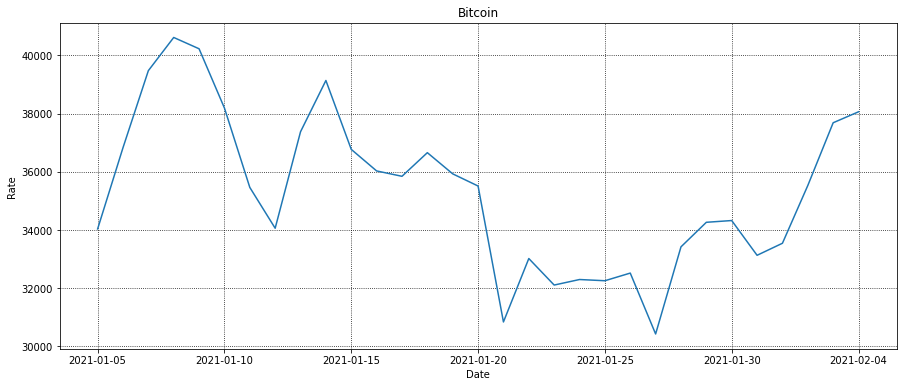

In [7]:
# Plotting the current rate flow
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = 15,6
plt.plot(df)
plt.grid(True, color = "k", linestyle = ":")
plt.title("Bitcoin")
plt.xlabel("Date")
plt.ylabel("Rate")

# Setting of the x-axis tickmarks
xaxis = hist_dates+[parse_today]
xaxis_organized = xaxis[::5]
xaxis_organized

plt.xticks(xaxis_organized);

In [8]:
# Linear model
x = np.arange(len(df))
y = df["Rate"].to_numpy()

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

reg = LinearRegression()
reg.fit(x, y);

In [9]:
# Prediction of n values
num_pred = 5
pred = [reg.predict([[days_to_subtract + i]]).item() for i in range(num_pred)]

In [10]:
# Creating a list of days that have been predicted
new_dates = []

for i in range(1, num_pred + 1):
    new_dates.append(today + timedelta(days = i))

new_dates_str = [x.strftime("%Y-%m-%d") for x in new_dates]

In [11]:
# Creating predicted Data Frame
pred_df = pd.DataFrame(data=pred, index=new_dates_str, columns=["Rate"])
pred_df

,Rate
2021-02-05,33248.846807
2021-02-06,33109.373854
2021-02-07,32969.900902
2021-02-08,32830.427949
2021-02-09,32690.954997


In [12]:
# Concatenation of current Data Frame with predicted Data Frame
new_df = pd.concat([df, pred_df])

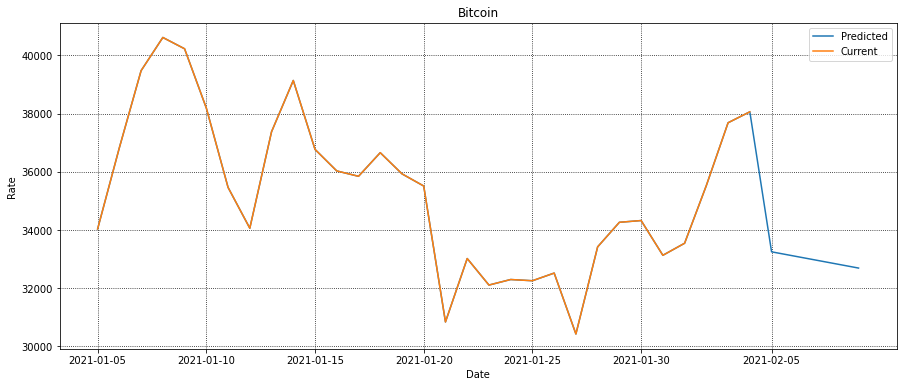

In [13]:
# Plotting the current along with the predicted rate flow
%matplotlib inline
rcParams["figure.figsize"] = 15,6
plt.plot(new_df)
plt.plot(df)
plt.grid(True, color = "k", linestyle = ":")
plt.legend(labels = ["Predicted", "Current"])
plt.title("Bitcoin")
plt.xlabel("Date")
plt.ylabel("Rate")

# Setting the x-axis tickmarks
xaxis = hist_dates + new_dates_str
xaxis_organized = xaxis[::5]
xaxis_organized

plt.xticks(xaxis_organized);